# __Programa 1__: Sistema Fuzzy SISO

Implementar el algoritmo 7.7 de la página 112 y resolver el ejercicio 4 de la página 134

# Método General para Mamdani y Godel

In [2]:
# Recibe como parámetro los 3 componentes del número difuso triangular
# y el valor del eje de abscisas "x"
# Es usado para obtener el "firing strength"
def obtener_grado_pertenencia(a,b,c,x):
    elemento_1 = max(0, ((x-b)/(b-a))+1)
    elemento_2 = max(0, ((x-b)/(b-c))+1)
    
    return min(elemento_1, elemento_2)


# Métodos de Mamdani

In [3]:
# Recibe un firing strength y un número difuso triangular
# Devuelve el output con la regla de Mandami
def salida_mamdani(fir_str, a, b, c, y):
    return min(fir_str, obtener_grado_pertenencia(a,b,c,y))
    
    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# f1 y f2 son firing strengths
# a,b,c son componentes de los números difusos de los consecuentes
def graficar_mamdani(f1,a1,b1,c1,f2,a2,b2,c2):
    X = np.array([])
    Y = np.array([])
    
    x=a1
    salto=(c2-a1)/2000 # Tomamos 2000 puntos en el intervalo dado
    while not math.isclose(x,c2):
        X = np.append(X,x)
        valor_y = max(salida_mamdani(f1,a1,b1,c1,x), salida_mamdani(f2,a2,b2,c2,x))
        Y = np.append(Y, valor_y)
        x+=salto
    
    plt.scatter(X,Y)
    plt.show()
        

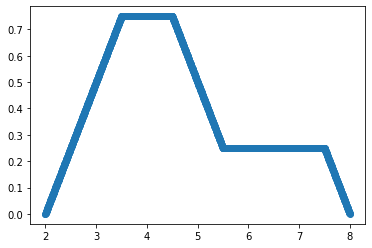

In [8]:
#Ejemplo de ejecución
graficar_mamdani(0.75,2,4,6,0.25,4,6,8)

In [6]:
# Usamos la regla del trapecio compuesto para obtener
# el centro de gravedad deffuzificado
def centro_gravedad_mamdani(f1,a1,b1,c1,f2,a2,b2,c2):
    
    salto=(c2-a1)/10000 #Tomamos 10000 puntos para mayor precisión
    sumatoria1=0
    sumatoria2=0
    x=a1
    while not math.isclose(x,c2):
        valor_y = max(salida_mamdani(f1,a1,b1,c1,x), salida_mamdani(f2,a2,b2,c2,x))
        valor_y_salto = max(salida_mamdani(f1,a1,b1,c1,x+salto), salida_mamdani(f2,a2,b2,c2,x+salto))
        valor_trapecio = (salto)*(valor_y+valor_y_salto)/2
        sumatoria1+=x*valor_trapecio
        sumatoria2+=valor_trapecio
        x+=salto
        
    print(sumatoria1/sumatoria2)
    

In [7]:
#Ejemplo de ejecución
centro_gravedad_mamdani(0.75,2,4,6,0.25,4,6,8)

4.578647352244475


# Métodos de Godel

In [10]:
def implicacion_godel(x,y):
    if x<=y:
        return 1
    else:
        return y
    

In [11]:
def salida_godel(fir_str, a, b, c, y):
    return implicacion_godel(fir_str, obtener_grado_pertenencia(a,b,c,y))

In [12]:
def graficar_godel(f1,a1,b1,c1,f2,a2,b2,c2):
    X = np.array([])
    Y = np.array([])
    
    x=a1
    salto=(c2-a1)/2000 # Tomamos 2000 puntos en el intervalo dado
    while not math.isclose(x,c2):
        X = np.append(X,x)
        valor_y = min(salida_godel(f1,a1,b1,c1,x), salida_godel(f2,a2,b2,c2,x))
        Y = np.append(Y, valor_y)
        x+=salto
    
    plt.scatter(X,Y)
    plt.show()

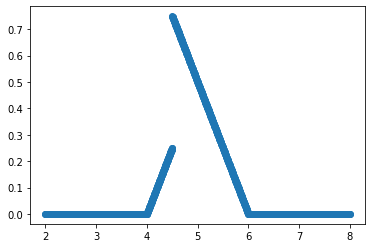

In [13]:
#Ejemplo de ejecución
graficar_godel(0.75,2,4,6,0.25,4,6,8)

# Problema 4

a) Hallar firing strength para $x_0=4$ y graficar

In [49]:
a1=1
b1=3
c1=5
a2=3
b2=5
c2=7
x=4

f1 = obtener_grado_pertenencia(a1,b1,c1,x)
f2 = obtener_grado_pertenencia(a2,b2,c2,x)

print("f1:", f1)
print("f2:", f2)

f1: 0.5
f2: 0.5


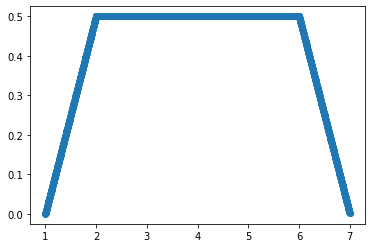

In [50]:
graficar_mamdani(f1,a1,b1,c1,f2,a2,b2,c2)

b) Hallar firing strength para $x_0=3.5$ y graficar

In [51]:
a1=1
b1=3
c1=5
a2=3
b2=5
c2=7
x=3.5

f1 = obtener_grado_pertenencia(a1,b1,c1,x)
f2 = obtener_grado_pertenencia(a2,b2,c2,x)

print("f1:", f1)
print("f2:", f2)

f1: 0.75
f2: 0.25


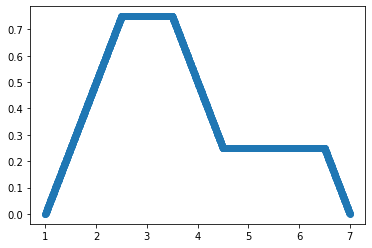

In [35]:
graficar_mamdani(f1,a1,b1,c1,f2,a2,b2,c2)